In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
x_zeros = np.random.multivariate_normal(mean=np.array((-1, -1)), cov=0.1*np.eye(2), size=(N//2,))
y_zeros = np.zeros((N//2,),dtype=np.float32)

In [3]:
print(f"X0 shape : {x_zeros.shape}, Y0 shape : {y_zeros.shape}")

X0 shape : (50, 2), Y0 shape : (50,)


In [4]:
x_ones = np.random.multivariate_normal(mean=np.array((1, 1)), cov=0.1*np.eye(2), size=(N//2,))
y_ones = np.ones((N//2,),dtype=np.float32)

In [5]:
print(f"X1 shape : {x_ones.shape}, Y1 shape : {y_ones.shape}")

X1 shape : (50, 2), Y1 shape : (50,)


In [6]:
#we are keeping y of x_zeros is zero and y of x_ones one.

In [7]:
X = np.concatenate((x_zeros,x_ones))
print(f"X shape : {X.shape}")

X shape : (100, 2)


In [8]:
Y = np.concatenate((y_zeros,y_ones)).reshape((100,1))
print(f"Y shape : {Y.shape}")

Y shape : (100, 1)


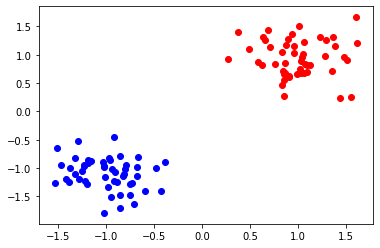

In [9]:
plt.scatter(x_zeros[:,0],x_zeros[:,1],color="blue")
plt.scatter(x_ones[:,0],x_ones[:,1],color="red")
plt.show()

In [10]:
import tensorflow as tf

In [11]:
with tf.name_scope("Placeholders"):
    x = tf.placeholder(tf.float32,(100,2))
    y = tf.placeholder(tf.float32,(100,1))

with tf.name_scope("Weights"):
    W = tf.Variable(tf.random_normal((1,2)))
    b = tf.Variable(tf.random_normal((1,1)))

with tf.name_scope("Prediction"):
    Z = tf.transpose(tf.add(tf.matmul(W,tf.transpose(x)), b))

with tf.name_scope("Loss"):
    L = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=Z)
    L = tf.reduce_mean(L)

with tf.name_scope("Optimizer"):
    train_op = tf.train.AdamOptimizer(0.001).minimize(L)

with tf.name_scope("Summaries"):
    tf.summary.scalar("Loss",L)
    merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter(r'C:\Users\Shambu\Google Drive\Deep Learning\Notebooks', tf.get_default_graph())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(2001):
        feed_dict = {x:X,y:Y}
        _, loss = sess.run([train_op, L], feed_dict=feed_dict)
        summary = sess.run(merged,feed_dict=feed_dict) 
        if i%100 is 0: print(f"Epoch : {i}, Loss : {loss}")
        train_writer.add_summary(summary, i)
    w_out = sess.run(W)
    logits = sess.run(Z, feed_dict={x:X})
    y_hat = sess.run(tf.math.sigmoid(logits))
    y_hat[y_hat>=0.5]  = 1
    y_hat[y_hat<0.5] = 0
    b_out = sess.run(b)

Epoch : 0, Loss : 1.2854710817337036
Epoch : 100, Loss : 1.1379623413085938
Epoch : 200, Loss : 1.0025415420532227
Epoch : 300, Loss : 0.8803645372390747
Epoch : 400, Loss : 0.7719499468803406
Epoch : 500, Loss : 0.6771627068519592
Epoch : 600, Loss : 0.5952466726303101
Epoch : 700, Loss : 0.5249888896942139
Epoch : 800, Loss : 0.4649426341056824
Epoch : 900, Loss : 0.41362830996513367
Epoch : 1000, Loss : 0.3696697950363159
Epoch : 1100, Loss : 0.33186134696006775
Epoch : 1200, Loss : 0.29918405413627625
Epoch : 1300, Loss : 0.2707951068878174
Epoch : 1400, Loss : 0.2460036426782608
Epoch : 1500, Loss : 0.22424465417861938
Epoch : 1600, Loss : 0.2050555944442749
Epoch : 1700, Loss : 0.1880565583705902
Epoch : 1800, Loss : 0.17293331027030945
Epoch : 1900, Loss : 0.15942499041557312
Epoch : 2000, Loss : 0.14731375873088837


In [13]:
accuracy =  1- (np.sum(abs(Y - y_hat)))/Y.shape[0]
print(f"Accuracy of the model : {accuracy*100}%")

Accuracy of the model : 100.0%


In [14]:
def decision_points(b,w1,w2):
    max_x1 = np.max(X[:,0])
    max_x2 = np.max(X[:,1])
    x1 = -b/w1 - (max_x2*w2)/w1
    x2 = -b/w2 - (max_x1*w1)/w2
    return [max_x1,x2],[x1,max_x2]

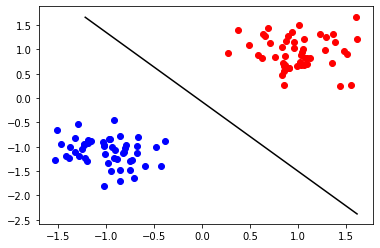

In [15]:
plt.scatter(x_zeros[:,0],x_zeros[:,1],color="blue")
plt.scatter(x_ones[:,0],x_ones[:,1],color="red")
w = np.squeeze(w_out)
x,y = decision_points(b_out,w[0],w[1])
plt.plot(x,y,color="black")
plt.show()